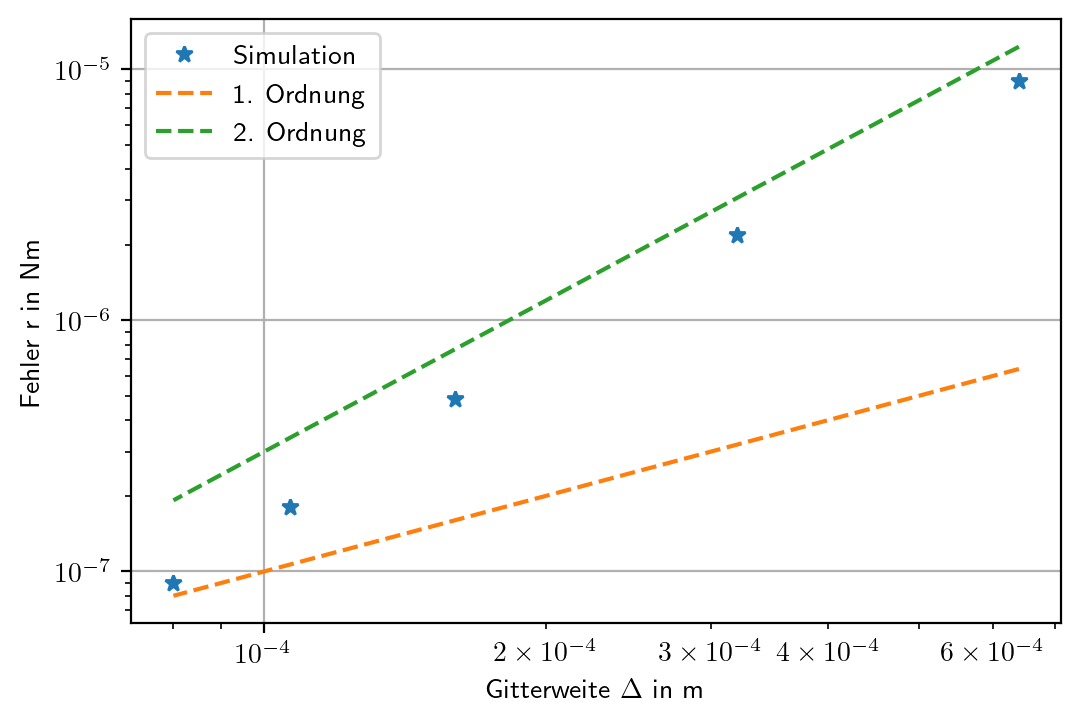

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import csv

rcParams["figure.dpi"] = 200
rcParams["text.usetex"] = True

#parameters
H=8e-6
R=32e-3

###################
# sort files in study
post_proc_dir = "Study2(Geschwindigkeitsprofile/"
ParameterStudies_dir=sorted(os.listdir(post_proc_dir))
#space discretization h
#Ns= np.array([500, 1000, 2000, 4000])
Ns1= np.array([50, 100, 200, 300, 400, 500, 600, 800, 1000])
#Ns1= np.array([100, 400, 1600, 3600, 6400,10000,14400,25600, 40000])
#CFDtorque
CFDtorques1=[]
for Parameterstudy_dir in ParameterStudies_dir:
    study_path=os.path.join(post_proc_dir,Parameterstudy_dir)
    data_path=os.path.join(study_path,"postProcessing/forces/0/moment.dat")
    torque = pd.DataFrame(pd.read_csv(data_path ,header=None,skiprows=3,delimiter="\t"))
    CFDtorque=torque[0].str.split(" ")
    CFDtorque=180*(float(CFDtorque[len(CFDtorque)-1][-1]))
    CFDtorques1=np.append(CFDtorques1,CFDtorque)
refTorque1=CFDtorques1[-1]
CFDtorques1=np.delete(CFDtorques1,[-1,-2,-3, -4])
Ns1=np.delete(Ns1,[-1,-2,-3, -4])
hs1=32e-3/Ns1


#plt.loglog(np.transpose(hs),np.abs(refTorque-CFDtorques),'*',label="nur in r-Richtung verfeinern")
plt.loglog(np.transpose(hs1),np.abs(refTorque1-CFDtorques1),'*',label="Simulation")
plt.loglog(hs1,0.001*hs1,'--',label="1. Ordnung")
plt.loglog(hs1,30*hs1**2,'--',label="2. Ordnung")
plt.grid()
#plt.xlim([1e-3,1e-5])
plt.xlabel("Gitterweite $\Delta$ in m")
plt.ylabel("Fehler r in Nm")
plt.legend()
#plt.scatter(-lambdaB-lambdaT,0)